In [4]:
import os, sys
os.chdir(os.path.abspath('..'))

In [5]:
import json, pickle
import argparse

import numpy as np
import pandas as pd
import torch
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
from torch.utils.tensorboard import SummaryWriter
from tbparse import SummaryReader


In [6]:
%load_ext autoreload
%autoreload 2

from src.vae_models import CVAE
import src.datasets as datasets
import src.utils as utils
import src.preprocess_lib as preprocess_lib
import src.conditioning_lib as conditioning_lib
from src.user_encoding_lib import UserEncoder


In [116]:
config_dir = 'runs/sweep_runs'
config_file = 'config.json'


In [117]:
df_experiment = pd.DataFrame()
for i, folder in enumerate(os.listdir(os.path.join(config_dir))):
    # Load config file
    with open(os.path.join(config_dir, folder, config_file), 'r') as f: config = json.load(f)
    config_flt = utils.flatten_dict(config)
    for tag in os.listdir(os.path.join(config_dir, folder, 'tensorboard')):
        tag_folder = os.path.join(config_dir, folder, 'tensorboard', tag)
        loss = SummaryReader(tag_folder).scalars["value"].values[-1]
        config_flt[tag] = loss
    df_experiment = pd.concat([df_experiment, pd.DataFrame(config_flt, index=[i])], axis=0)

In [113]:
df_experiment.columns

Index(['data_random_seed', 'data_dataset_dir', 'data_dataset_name',
       'data_val_ratio', 'data_resolution', 'data_pad', 'data_ampute_params_a',
       'data_ampute_params_b', 'data_subsample_rate_user',
       'data_subsample_rate_day', 'data_scaling_shift', 'data_scaling_zero_id',
       'data_scaling_log_space', 'data_condition_tag_list',
       'data_user_embedding_kwargs_model_kwargs_num_topics',
       'data_user_embedding_kwargs_model_kwargs_num_clusters',
       'data_user_embedding_kwargs_model_kwargs_reduce_dim',
       'data_user_embedding_kwargs_model_kwargs_num_lower_dims',
       'data_user_embedding_kwargs_fit_kwargs_lda_perp_tol',
       'data_user_embedding_kwargs_fit_kwargs_lda_max_iter',
       'data_user_embedding_kwargs_fit_kwargs_lda_batch_size',
       'data_user_embedding_kwargs_fit_kwargs_lda_verbose',
       'data_user_embedding_kwargs_fit_kwargs_lda_learning_method',
       'data_user_embedding_kwargs_fit_kwargs_lda_evaluate_every',
       'data_user_embed

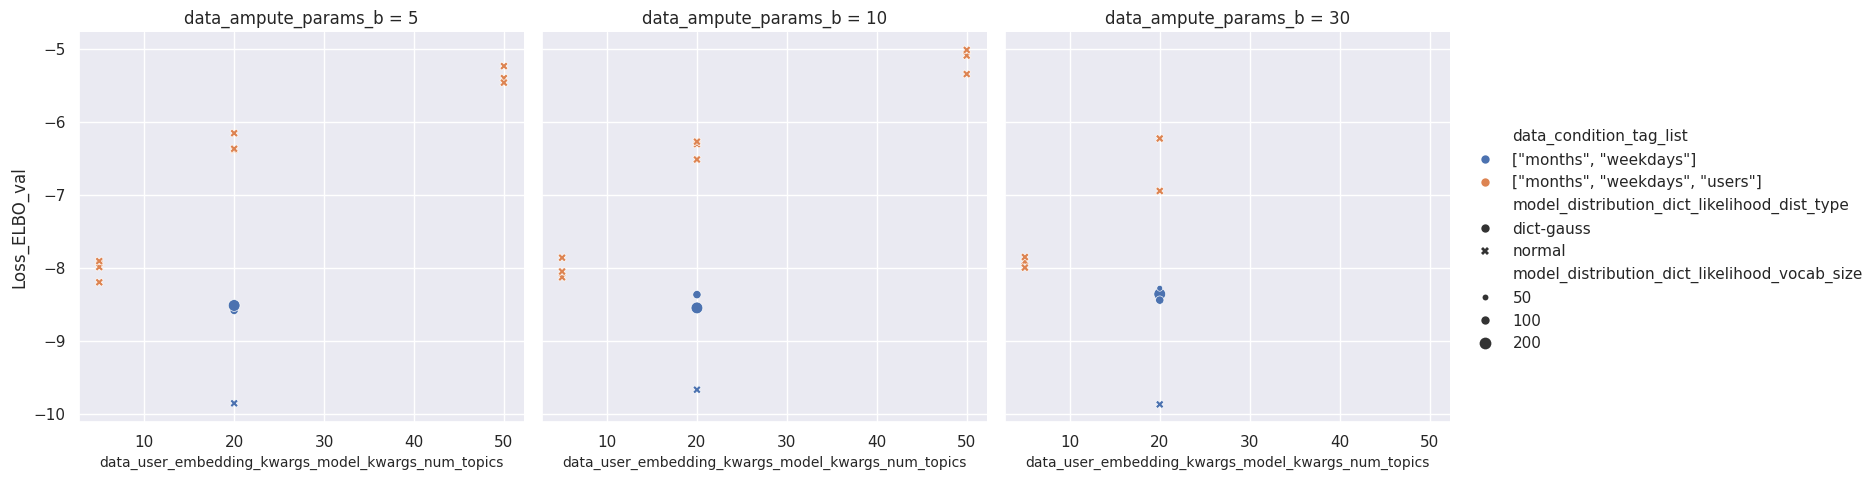

In [162]:
h = sns.relplot(data=df_experiment, col='data_ampute_params_b', y='Loss_ELBO_val', hue='data_condition_tag_list', style='model_distribution_dict_likelihood_dist_type', x='data_user_embedding_kwargs_model_kwargs_num_topics', size='model_distribution_dict_likelihood_vocab_size' )
## change the suptitle font size
h.set_xlabels( size=10)